
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn
import pandas as pd

Updated file `D:\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [2]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [3]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [4]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    coll['sdist'] = small.score
    coll['ldist'] = large.score
    #coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio_rel'] = coll.srel**0.2*coll.srel/coll.lrel
    coll['nb'] = coll.small/tot.tot
    coll['combo'] = small.ascore*large.ascore
    coll['mass_dist'] = coll.combo * coll.ratio_rel
    return coll

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [5]:
tot = nb.frame(nb.totals(50000), 'tot')

In [6]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [7]:
corpus = nb.book_corpus(ddk="813%", period=(1980, 2000), limit = 500)

In [8]:
corpus

,urn,author,title,year
0,2012090708204,"Paige, Laurie",Gylne løfter,1992
1,2014111108216,"Erickson, Lynn",Farlige affærer,1992
2,2007120300100,"Fowler, Connie May",Bittersøt,1993
3,2007112204095,"Krantz, Judith",Mistrals datter,1991
4,2010030403002,"O'Connell, Carol",Skyggedans,1995
...,...,...,...,...
495,2008071500124,"Twain, Mark",Tom Sawyer,1997
496,2008021304003,"Waller, Robert James",Broene i Madison County,1995
497,2008021100119,"Bennett, Cherie",Unge hjerter,1995
498,2008092904059,"Grisham, John",Gatens advokat,1999


Set up the distance parameters and collword, smd is small distance while lmd is large distance. These values are half of the actual window, and used to make a normalized score, call ascore. See below.

In [9]:
smd = 5
lmd = 10
collword = 'kjærlighet'

In [10]:
a1 = dist_coll_urn(collword, urns=list(corpus.urn), after= int(2*smd), before = 0)
a2 = dist_coll_urn(collword, urns=list(corpus.urn), after= int(2*lmd), before = 0)

In [11]:
b1 = dist_coll_urn(collword, urns=list(corpus.urn), after=0, before = int(2*smd))
b2 = dist_coll_urn(collword, urns=list(corpus.urn), after=0, before = int(2*lmd))

## Normalized distance score

In [12]:
a1['ascore'] = smd/a1.score
a2['ascore'] = lmd/a2.score

In [13]:
b1['ascore'] = smd/b1.score
b2['ascore'] = lmd/b2.score

## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [14]:
coll = make_coll_df(a1, a2, tot)
collb = make_coll_df(b1, b2, tot)

In [15]:
coll.sort_values(by='mass_dist', ascending=False)[:20]

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
romantikk,98.0,107.0,2.35,2.66,0.002592,0.001509,0.522047,4.503205e+07,7.998720,4.175710
omsorg,31.0,33.0,2.49,3.40,0.000820,0.000465,0.425346,1.138203e+06,5.905977,2.512084
oppmerksomhet,8.0,8.0,2.44,3.06,0.000212,0.000113,0.345335,2.620866e+05,6.696668,2.312592
Søskenkjærlighet,4.0,4.0,2.12,3.38,0.000106,0.000056,0.300631,NaN,6.977783,2.097741
pinne,7.0,7.0,2.50,3.21,0.000185,0.000099,0.336234,1.698347e+06,6.230530,2.094917
forrige,82.0,83.0,4.12,4.32,0.002169,0.001170,0.543402,1.912666e+06,2.809241,1.526546
respekt,15.0,16.0,2.98,4.05,0.000397,0.000226,0.367123,6.022301e+05,4.142845,1.520935
Hjerteknuseren,5.0,5.0,2.86,3.86,0.000132,0.000071,0.314352,NaN,4.529150,1.423748
troskap,6.0,6.0,3.00,3.83,0.000159,0.000085,0.326026,1.759110e+06,4.351610,1.418739
lojalitet,10.0,10.0,3.35,3.85,0.000264,0.000141,0.361096,1.831625e+06,3.876720,1.399867


In [16]:
collb.sort_values(by='ratio_rel', ascending=False)[:20]

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
sin,291.0,370.0,-2.28,-4.85,0.007696,0.005211,0.558019,2.253852e+05,4.521613,2.523147
av,691.0,1046.0,-3.35,-7.34,0.018276,0.014731,0.557213,6.311672e+04,2.033430,1.133053
om,547.0,813.0,-3.19,-6.74,0.014467,0.011449,0.541594,1.118796e+05,2.325516,1.259485
spennende,74.0,74.0,-7.83,-7.90,0.001957,0.001042,0.539542,3.123102e+06,0.808316,0.436121
Bøker,71.0,71.0,-2.09,-2.16,0.001878,0.001000,0.535095,2.410619e+07,11.075669,5.926536
miljøer,70.0,70.0,-6.98,-7.05,0.001851,0.000986,0.533579,9.693581e+06,1.016074,0.542156
eksotiske,70.0,70.0,-5.01,-5.08,0.001851,0.000986,0.533579,2.694495e+07,1.964575,1.048256
steder,71.0,72.0,-4.10,-4.34,0.001878,0.001014,0.527663,7.514821e+05,2.809936,1.482700
og,1152.0,2063.0,-5.12,-9.63,0.030468,0.029053,0.521703,4.553813e+04,1.014084,0.529050
annerledes,72.0,78.0,-9.75,-10.07,0.001904,0.001098,0.495317,1.728399e+06,0.509256,0.252243


## Sorting 

Sorting on the reference is by column 'nb'

In [17]:
coll.sort_values(by='nb', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
romantikk,98,107,2.35,2.66,0.00259191,0.00150881,0.522047,4.50321e+07,7.99872,4.17571
Kjærlighet,20,25,4.64,6.32,0.000528961,0.000352525,0.331832,5.96249e+06,1.70504,0.565787
hengivenhet,21,25,3.01,5.38,0.000555409,0.000352525,0.35184,5.59877e+06,3.0876,1.08634
Robbie,6,11,6.48,10.55,0.000158688,0.000155111,0.177833,4.54286e+06,0.731379,0.130063
Kathleen,6,12,4.94,11.13,0.000158688,0.000169212,0.163013,4.42161e+06,0.909385,0.148242
Harlequin,5,74,6.5,12.84,0.00013224,0.00104347,0.02124,4.40072e+06,0.599089,0.0127247
forsvinn,5,5,5.26,6.26,0.00013224,7.0505e-05,0.314352,4.16215e+06,1.51848,0.477338
Bram,4,12,5.69,12.41,0.000105792,0.000169212,0.10021,3.78348e+06,0.708086,0.0709576
intriger,5,5,4.78,5.78,0.00013224,7.0505e-05,0.314352,3.71141e+06,1.80973,0.568893
fridd,4,4,5.31,6.56,0.000105792,5.6404e-05,0.300631,3.69323e+06,1.4354,0.431525


In [18]:
coll.sort_values(by='mass_dist', ascending=False)[:20].fillna(0).style.background_gradient()

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
romantikk,98,107,2.35,2.66,0.00259191,0.00150881,0.522047,4.50321e+07,7.99872,4.17571
omsorg,31,33,2.49,3.4,0.000819889,0.000465333,0.425346,1.1382e+06,5.90598,2.51208
oppmerksomhet,8,8,2.44,3.06,0.000211584,0.000112808,0.345335,262087,6.69667,2.31259
Søskenkjærlighet,4,4,2.12,3.38,0.000105792,5.6404e-05,0.300631,0,6.97778,2.09774
pinne,7,7,2.5,3.21,0.000185136,9.87069e-05,0.336234,1.69835e+06,6.23053,2.09492
forrige,82,83,4.12,4.32,0.00216874,0.00117038,0.543402,1.91267e+06,2.80924,1.52655
respekt,15,16,2.98,4.05,0.00039672,0.000225616,0.367123,602230,4.14285,1.52093
Hjerteknuseren,5,5,2.86,3.86,0.00013224,7.0505e-05,0.314352,0,4.52915,1.42375
troskap,6,6,3,3.83,0.000158688,8.46059e-05,0.326026,1.75911e+06,4.35161,1.41874
lojalitet,10,10,3.35,3.85,0.00026448,0.00014101,0.361096,1.83163e+06,3.87672,1.39987


# collb

In [19]:
collb.sort_values(by='mass_dist', ascending=False)[['nb', 'mass_dist']][:40].fillna(0).style.background_gradient()

,nb,mass_dist
skildrer,2.3248e+06,8.15752
Bøker,2.41062e+07,5.92654
sann,1.21859e+06,4.67065
udødelige,4.82626e+06,4.5208
livs,3.02837e+06,4.48249
ekte,1.47765e+06,4.03068
evig,859387,3.84115
fullkomne,1.36555e+06,3.61511
Guds,307739,3.13686
Min,313476,2.99938


In [20]:
collb.sort_values(by='nb', ascending=False)[['nb', 'mass_dist']][:40].fillna(0).style.background_gradient()

,nb,mass_dist
eksotiske,2.69449e+07,1.04826
Bøker,2.41062e+07,5.92654
Kjærlighet,1.01362e+07,0.376652
miljøer,9.69358e+06,0.542156
Evig,8.77304e+06,2.28435
Sweet,7.54338e+06,0.257132
Ekte,7.45762e+06,2.80714
svulmet,5.20487e+06,2.0036
Fantasi,4.96897e+06,1.84984
udødelige,4.82626e+06,4.5208


# coll

In [27]:
coll.sort_values(by='mass_dist', ascending=False)[['nb', 'mass_dist','combo']][:10].fillna(0).style.background_gradient()

,nb,mass_dist,combo
romantikk,4.50321e+07,4.17571,7.99872
omsorg,1.1382e+06,2.51208,5.90598
oppmerksomhet,262087,2.31259,6.69667
Søskenkjærlighet,0,2.09774,6.97778
pinne,1.69835e+06,2.09492,6.23053
forrige,1.91267e+06,1.52655,2.80924
respekt,602230,1.52093,4.14285
Hjerteknuseren,0,1.42375,4.52915
troskap,1.75911e+06,1.41874,4.35161
lojalitet,1.83163e+06,1.39987,3.87672


In [22]:
coll.sort_values(by='nb', ascending=False)[['nb', 'mass_dist','combo']][:10].fillna(0).style.background_gradient()

,nb,mass_dist,combo
romantikk,4.50321e+07,4.17571,7.99872
Kjærlighet,5.96249e+06,0.565787,1.70504
hengivenhet,5.59877e+06,1.08634,3.0876
Robbie,4.54286e+06,0.130063,0.731379
Kathleen,4.42161e+06,0.148242,0.909385
Harlequin,4.40072e+06,0.0127247,0.599089
forsvinn,4.16215e+06,0.477338,1.51848
Bram,3.78348e+06,0.0709576,0.708086
intriger,3.71141e+06,0.568893,1.80973
fridd,3.69323e+06,0.431525,1.4354


# jaccard similarity

# for collb

In [23]:
jaccard_scoresb = nb.frame({'mass_dist': {x:df_jaccard(collb, 'nb', 'mass_dist', x) for x in range(5, 210, 5)},
                            'dist_combo': {x:df_jaccard(collb, 'nb', 'combo', x) for x in range(5, 210, 5)},
                           'mass_ratio': {x:df_jaccard(collb, 'nb', 'ratio_rel', x) for x in range(5, 210, 5)}
                          }).transpose()

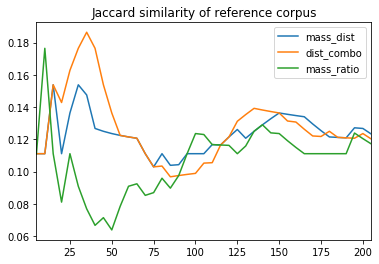

In [24]:
jaccard_scoresb.plot(title='Jaccard similarity of reference corpus');

# for coll

In [25]:
jaccard_scores = nb.frame({'mass_dist': {x:df_jaccard(coll, 'nb', 'mass_dist', x) for x in range(5, 210, 5)},
                            'dist_combo': {x:df_jaccard(coll, 'nb', 'combo', x) for x in range(5, 210, 5)},
                           'mass_ratio': {x:df_jaccard(coll, 'nb', 'ratio_rel', x) for x in range(5, 210, 5)}
                          }).transpose()

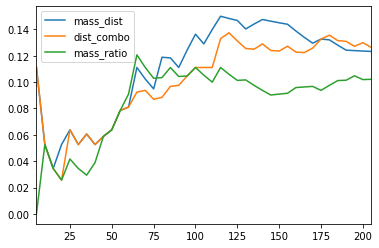

In [26]:
jaccard_scores.plot();